In [1]:
#!zypper --non-interactive in --no-recommends libpango-1_0-0 libharfbuzz0 libgthread-2_0-0
# # Extra dependencis
# !zypper --non-interactive in --no-recommends gcc gcc-c++ zlib-devel libffi-devel libjpeg-turbo openjpeg2 openjpeg2-devel

In [2]:
# !pip install opencv-python python-doctr fonttools

# OCR with mindee/doctr
- https://github.com/mindee/doctr

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from doctr.utils.visualization import visualize_page


In [21]:
# Load the OCR model
model = ocr_predictor(pretrained=True)

In [5]:
# Load the image
img_path = '../_data/resource/note_child.jpg'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Noise removal

In [6]:
# Load the image
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((2, 2))

# Apply Gaussian blur to reduce noise before Canny
blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)

# Apply Canny Edge Detector
edges = cv2.Canny(blurred, 50, 150)

# Dilate the edges to make text regions more contiguous
dilated = cv2.dilate(edges, kernel, iterations=1)

# Find and fill contours
contours, _ = cv2.findContours(dilated, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
filled = cv2.drawContours(np.zeros_like(img), contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Dilate agine
img_dilated = cv2.dilate(filled, kernel, iterations=1)

# Sharpen the image
sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened = cv2.filter2D(img_dilated, -1, sharpen_kernel)

image = sharpened

### Ensure image has right properties

In [7]:
# ensure image is not grayscale
if image.ndim == 2: # Is image grayscale?
    rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
else:
    rgb_image = image

## Plot all images

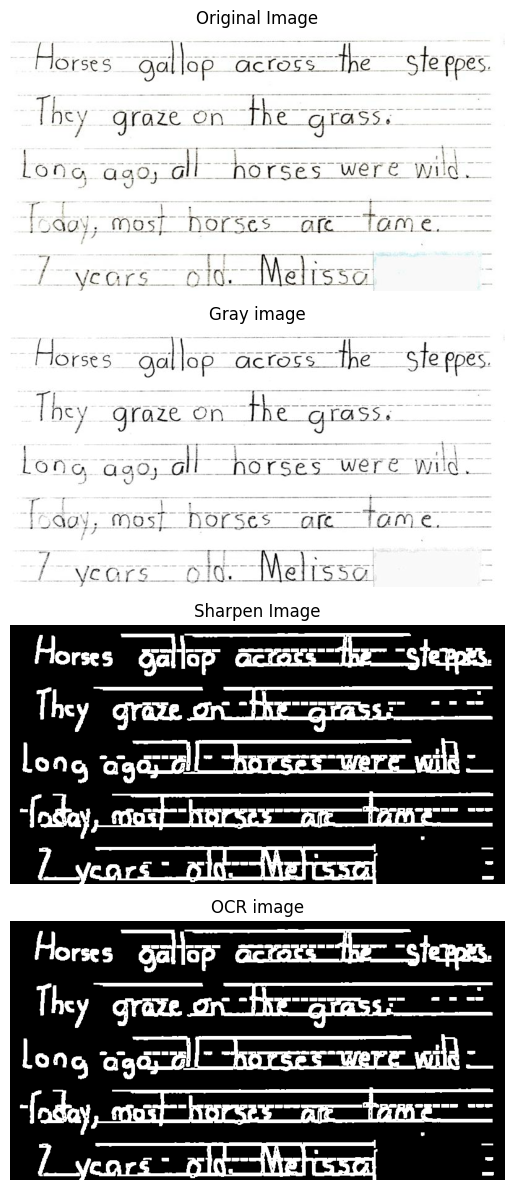

In [8]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 12)) # 1 row, 3 columns

# Display each image in a subplot and set titles
axs[0].imshow(img)
axs[0].set_title('Original Image')

axs[1].imshow(img_gray, 'gray')
axs[1].set_title('Gray image')

axs[2].imshow(sharpened)
axs[2].set_title('Sharpen Image')

axs[3].imshow(rgb_image)
axs[3].set_title('OCR image')

# Turn off the axes for all subplots in one go
for ax in axs:
    ax.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Perform OCR on np array

In [9]:
# OCR from image path
doc = DocumentFile.from_images(img_path)
res_doc = model(doc)

In [10]:
# OCR from image
res_image = model([rgb_image])

## Visualize

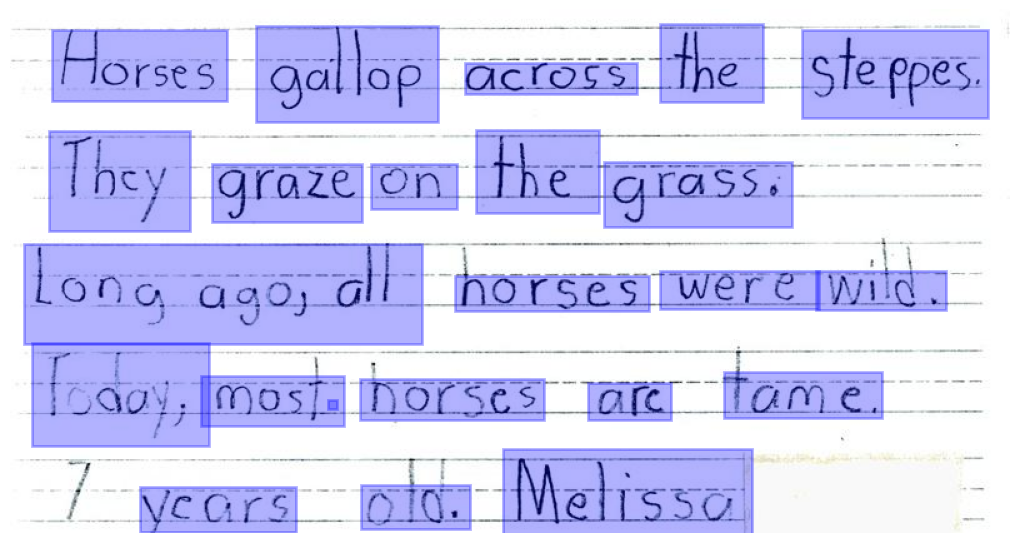

In [11]:
# visualize doc result
visualize_page(res_doc.pages[0].export(), doc[0])
plt.show()

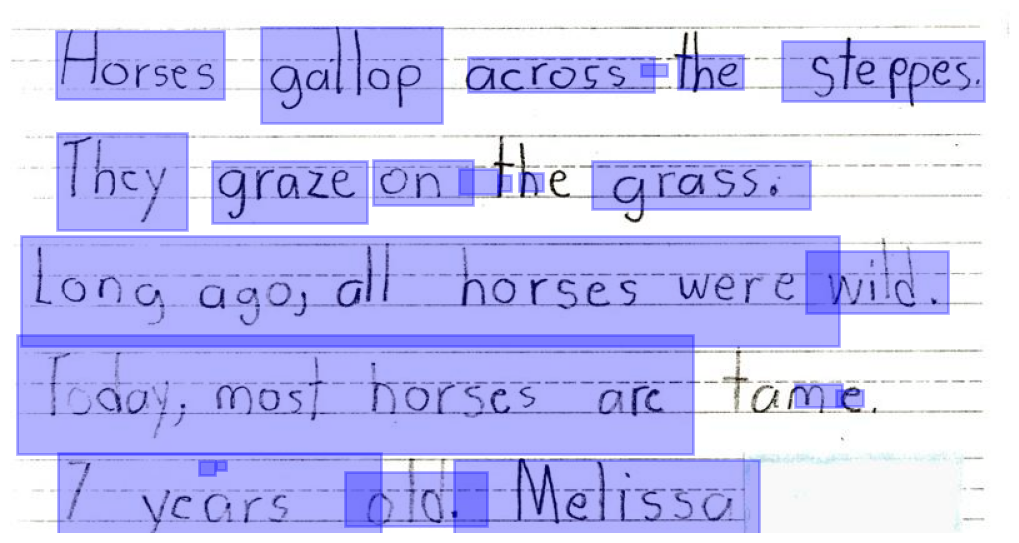

In [12]:
# visualize image result
visualize_page(res_image.pages[0].export(), img)
plt.show()

## OCR result

In [13]:
res_doc

Document(
  (pages): [Page(
    dimensions=(419, 800)
    (blocks): [
      Block(
        (lines): [Line(
          (words): [
            Word(value='Horses', confidence=1.0),
            Word(value='gallop', confidence=0.96),
            Word(value='across', confidence=0.97),
            Word(value='the', confidence=0.93),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [Word(value='steppes', confidence=0.75)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='They', confidence=0.99),
            Word(value='graze', confidence=0.85),
            Word(value='on', confidence=0.96),
            Word(value='the', confidence=0.99),
            Word(value='grassa', confidence=0.41),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='Longagoyat', confidence=0.25),
   

In [22]:
res_image

Document(
  (pages): [Page(
    dimensions=(419, 800)
    (blocks): [
      Block(
        (lines): [Line(
          (words): [Word(value='Horses', confidence=0.8)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='galop', confidence=0.26),
            Word(value='ador', confidence=0.054),
            Word(value='-', confidence=0.92),
            Word(value='1A', confidence=0.066),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [Word(value='-stemo', confidence=0.057)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='They', confidence=0.72),
            Word(value='grae', confidence=0.37),
            Word(value='on', confidence=0.47),
            Word(value='-', confidence=0.98),
            Word(value='.', confidence=0.62),
            Word(value='1', confidence=0.66),
 

## Change model

In [14]:
model_crnn = ocr_predictor(det_arch = 'db_resnet50',
                          reco_arch = 'crnn_vgg16_bn',
                          pretrained = True)

In [15]:
res_crnn = model_crnn(doc)
res_crnn

Document(
  (pages): [Page(
    dimensions=(419, 800)
    (blocks): [
      Block(
        (lines): [Line(
          (words): [
            Word(value='Horses', confidence=1.0),
            Word(value='gallop', confidence=0.96),
            Word(value='across', confidence=0.97),
            Word(value='the', confidence=0.93),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [Word(value='steppes', confidence=0.75)]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='They', confidence=0.99),
            Word(value='graze', confidence=0.85),
            Word(value='on', confidence=0.96),
            Word(value='the', confidence=0.99),
            Word(value='grassa', confidence=0.41),
          ]
        )]
        (artefacts): []
      ),
      Block(
        (lines): [Line(
          (words): [
            Word(value='Longagoyat', confidence=0.25),
   